In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

import math
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/content/data.csv
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/configurations/config_default
/content/.config/logs/2024.06.11/14.39.51.341825.log
/content/.config/logs/2024.06.11/14.52.31.690891.log
/content/.config/logs/2024.06.11/14.46.52.741720.log
/content/.config/logs/2024.06.11/14.52.31.097641.log
/content/.config/logs/2024.06.11/14.46.42.755460.log
/content/.config/logs/2024.06.11/14.52.20.653491.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv


In [ ]:
#Carregar Base de Dados:
cars_data = pd.read_csv('data.csv')

In [ ]:
#Visualizar dados da base
cars_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#Visualizar dados da base, com relação ao tipo.
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
cars_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
#Separando e renomenado colunas

cars_data.columns = cars_data.columns.str.lower().str.replace(' ', '_')
cars_data.rename(columns={'engine_fuel_type': 'fuel_type', 'engine_hp': 'hp',
                          'engine_cylinders': 'cylinders',
                          'transmission_type': 'transmission',
                          'driven_wheels': 'drive', 'number_of_doors': 'doors',
                          'market_category': 'market', 'vehicle_size': 'size',
                          'vehicle_style': 'style', 'msrp': 'price'},
                 inplace=True)

In [ ]:
#Verificando e removendo duplicatas no dataframe
print('Number of duplicates are: ', cars_data.duplicated().sum())
cars_data = cars_data.drop_duplicates()

Number of duplicates are:  715


In [ ]:
#Verificando valores nulos (Null)
print('Number of missing values in each columns are below: ',
      cars_data.isnull().sum())

Number of missing values in each columns are below:  make               0
model              0
year               0
fuel_type          3
hp                69
cylinders         30
transmission       0
drive              0
doors              6
market          3376
size               0
style              0
highway_mpg        0
city_mpg           0
popularity         0
price              0
dtype: int64


In [ ]:
#Normalizando valores nulos.
#Os combustíveis nulos são por causa de carros elétricos,
# os demais valores preenchemos com 0 e com o que mais aparece (.mean)

cars_data['fuel_type'] = cars_data['fuel_type'].fillna('regular unleaded')

cars_data['hp'] = cars_data['hp'].fillna(0)

cars_data['cylinders'] = cars_data['cylinders'].fillna(0)

cars_data['doors'] = cars_data['doors'].fillna(cars_data['doors'].mean())

cars_data['market'] = cars_data['market'].fillna("UNKNOWN")

In [ ]:
#Removendo valores desconhecidos na coluna "Transmissão"
cars_data.drop(cars_data[cars_data['transmission'] == 'UNKNOWN'].index,
               axis='index', inplace=True)

#Removendo valores desconhecidos da "categoria"
cars_data.drop(cars_data[cars_data['market'] == 'UNKNOWN'].index,
               axis='index', inplace=True)

In [ ]:
#Contando quantos itens sobraram no dataframe após remoção de duplicatas e valores desconhecidos
contagem_itens = cars_data.count()

# Exibir o resultado
print(contagem_itens)

make            7820
model           7820
year            7820
fuel_type       7820
hp              7820
cylinders       7820
transmission    7820
drive           7820
doors           7820
market          7820
size            7820
style           7820
highway_mpg     7820
city_mpg        7820
popularity      7820
price           7820
dtype: int64


In [ ]:
#Verificando a distribuição das categorias dos carros
frequencia_valores_market = cars_data['market'].value_counts()

# Exibir o resultado
print(frequencia_valores_market)

market
Crossover                                          1075
Flex Fuel                                           855
Luxury                                              819
Luxury,Performance                                  659
Hatchback                                           574
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: count, Length: 71, dtype: int64


In [ ]:
#Separando carros que de acordo com a categoria de mercado contenham Luxo, Performance e Alta performance
cars_data_popular = cars_data[~cars_data['market'].str.contains("Luxury|Performance|High-Performance")]
cars_data_luxury = cars_data[cars_data['market'].str.contains("Luxury|Performance|High-Performance")]


#Trabalhando com a base de dados de populares

In [ ]:

#Separando as colunas do dataframe em colunas com valores núméricos e valores "categóricas", carros populares

num_col_popular = cars_data_popular.select_dtypes(include=[np.number])
cat_col_popular = cars_data_popular.select_dtypes(exclude=[np.number])

In [ ]:
#Visualizando a distribuição de categorias dos populares.

for col in cat_col_popular:
    print(col)
    print(cars_data_popular[col].unique())
    print(cars_data_popular[col].nunique())
    print('\n', "======================================", '\n')

make
['Chrysler' 'Mazda' 'Mitsubishi' 'FIAT' 'GMC' 'Hyundai' 'Honda' 'Nissan'
 'Ford' 'Chevrolet' 'Toyota' 'Dodge' 'Pontiac' 'Subaru' 'Volkswagen'
 'Plymouth' 'Buick' 'Kia' 'Suzuki' 'Scion']
20


model
['200' '2' '3000GT' '323' '3' '500e' '500' '500X' 'Acadia Limited'
 'Acadia' 'Accent' 'Accord Crosstour' 'Accord Hybrid'
 'Accord Plug-In Hybrid' 'Altima Hybrid' 'Armada' 'Aspen' 'Aspire'
 'Avalanche' 'Avalon Hybrid' 'Avenger' 'Aveo' 'Aztek' 'B-Series Pickup'
 'B9 Tribeca' 'Baja' 'Beetle Convertible' 'Beetle'
 'Black Diamond Avalanche' 'Bolt EV' 'C-Max Hybrid' 'Camry Hybrid'
 'Canyon' 'Captiva Sport' 'Caravan' 'Celica' 'Civic CRX' 'Civic'
 'Colorado' 'Colt' 'Corolla iM' 'CR-V' 'CR-Z' 'Crosstour' 'Crosstrek'
 'Crown Victoria' 'Cruze' 'CX-3' 'CX-5' 'CX-7' 'CX-9' 'Dakota' 'Daytona'
 'Durango' 'e-Golf' 'E-Series Van' 'E-Series Wagon' 'Eclipse' 'Edge'
 'Elantra Touring' 'Element' 'Enclave' 'Encore' 'Endeavor' 'Envision'
 'Equinox' 'Escape Hybrid' 'Escape' 'Excel' 'Explorer Sport Trac'
 'Explo

In [ ]:
#Verificando a base de populares e distribuição por categoria
frequencia_valores_market = cars_data_popular['market'].value_counts()

# Exibir o resultado
print(frequencia_valores_market)

market
Crossover              1075
Flex Fuel               855
Hatchback               574
Hybrid                  121
Diesel                   84
Crossover,Hatchback      72
Crossover,Flex Fuel      64
Hatchback,Hybrid         64
Crossover,Hybrid         42
Flex Fuel,Diesel         16
Hatchback,Diesel         14
Hatchback,Flex Fuel       7
Crossover,Diesel          7
Flex Fuel,Hybrid          2
Name: count, dtype: int64


In [ ]:
#Contando quantidade de carros populares
contagem_itens = cars_data_popular.count()

# Exibir o resultado
print(contagem_itens)

make            2997
model           2997
year            2997
fuel_type       2997
hp              2997
cylinders       2997
transmission    2997
drive           2997
doors           2997
market          2997
size            2997
style           2997
highway_mpg     2997
city_mpg        2997
popularity      2997
price           2997
dtype: int64


In [ ]:
#Verificando Outliers dos carros populares
for i in num_col_popular:
    fig = px.box(cars_data_popular, x=cars_data_popular[i])
    fig.update_traces(fillcolor='#C9A26B')
    fig.show()

In [ ]:
#Removendo Outliers dos carros populares
s1 = cars_data_popular.shape
clean = cars_data_popular[['hp', 'cylinders', 'highway_mpg', 'city_mpg', 'price']]
for i in clean.columns:
    qt1 = cars_data_popular[i].quantile(0.25)
    qt3 = cars_data_popular[i].quantile(0.75)
    iqr = qt3 - qt1
    lower = qt1 - (1.5 * iqr)
    upper = qt3 + (1.5 * iqr)
    min_in = cars_data_popular[cars_data_popular[i] < lower][i].index
    max_in = cars_data_popular[cars_data_popular[i] > upper][i].index
    cars_data_popular.drop(min_in, inplace=True)
    cars_data_popular.drop(max_in, inplace=True)
s2 = cars_data_popular.shape
outliers = s1[0] - s2[0]
print("Deleted outliers are: ", outliers)

Deleted outliers are:  325


In [ ]:
#Verificando Outliers dos carros populares
for i in num_col_popular:
    fig = px.box(cars_data_popular, x=cars_data_popular[i])
    fig.update_traces(fillcolor='#C9A26B')
    fig.show()

In [ ]:
#Contagem de itens pós remoção de outliers
contagem_itens_populares = cars_data_popular.count()

# Exibir o resultado
print(contagem_itens_populares)


make            2672
model           2672
year            2672
fuel_type       2672
hp              2672
cylinders       2672
transmission    2672
drive           2672
doors           2672
market          2672
size            2672
style           2672
highway_mpg     2672
city_mpg        2672
popularity      2672
price           2672
dtype: int64


In [ ]:
#Gerando histogramas de carros populares, ou seja,
#Vendo a distribuição de valores pra cada coluna
for i in cars_data_popular:
    fig = px.histogram(cars_data_popular, x=i, color_discrete_sequence=['#C9A26B'])
    fig.show()

#Trabalhando com a base de dados de luxo e performance

In [ ]:
#Separando colunas numéricas e categóricas dos Carros de luxo
num_col_luxury = cars_data_luxury.select_dtypes(include=[np.number])
cat_col_luxury = cars_data_luxury.select_dtypes(exclude=[np.number])

In [ ]:
#Visualizando a distribuição de categorias dos populares.

for col in cars_data_luxury:
    print(col)
    print(cars_data_luxury[col].unique())
    print(cars_data_luxury[col].nunique())
    print('\n', "======================================", '\n')

make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo'
 'Mitsubishi' 'Ferrari' 'Mazda' 'Alfa Romeo' 'McLaren' 'Maybach' 'Porsche'
 'Toyota' 'Saab' 'Honda' 'Cadillac' 'Bentley' 'Oldsmobile' 'Dodge'
 'Lamborghini' 'Lincoln' 'Hyundai' 'Volkswagen' 'Chevrolet' 'Pontiac'
 'Subaru' 'Spyker' 'Kia' 'Acura' 'Ford' 'Rolls-Royce' 'Maserati' 'Lexus'
 'Aston Martin' 'Land Rover' 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER'
 'Buick' 'Plymouth' 'Tesla' 'GMC' 'Bugatti']
47


model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '5 Series Gran Turismo' '5 Series' '500-Class' '500'
 '550' '560-Class' '570S' '575M' '57' '599' '6 Series Gran Coupe'
 '6 Series' '600-Class' '612 Scaglietti' '62' '650S Coupe' '650S Spider'
 '7 Series' '718 Cayman' '74

In [ ]:
#Verificando a base de carros de luxo e distribuição por categoria
frequencia_valores_market_luxury = cars_data_luxury['market'].value_counts()

# Exibir o resultado
print(frequencia_valores_market_luxury)

market
Luxury                                                    819
Luxury,Performance                                        659
Performance                                               520
Crossover,Luxury                                          406
Luxury,High-Performance                                   334
Exotic,High-Performance                                   254
Factory Tuner,Luxury,High-Performance                     215
High-Performance                                          198
Hatchback,Performance                                     197
Crossover,Luxury,Performance                              112
Factory Tuner,High-Performance                            104
Flex Fuel,Performance                                      87
Factory Tuner,Performance                                  83
Exotic,Luxury,High-Performance                             77
Crossover,Performance                                      69
Luxury,Hybrid                                              52
E

In [ ]:

#Contagem de itens de carros de luxo
contagem_itens_luxury = cars_data_luxury.count()

# Exibir o resultado
print(contagem_itens_luxury)

make            4823
model           4823
year            4823
fuel_type       4823
hp              4823
cylinders       4823
transmission    4823
drive           4823
doors           4823
market          4823
size            4823
style           4823
highway_mpg     4823
city_mpg        4823
popularity      4823
price           4823
dtype: int64


In [ ]:
#Verificando Outliers dos carros de luxo

for i in num_col_luxury:
    fig = px.box(cars_data_luxury, x=cars_data_luxury[i])
    fig.update_traces(fillcolor='#C9A26B')
    fig.show()



In [ ]:

###Removendo Outliers dos carros de luxo

s1 = cars_data_luxury.shape
clean = cars_data_luxury[['hp', 'cylinders', 'highway_mpg', 'city_mpg', 'price']]
for i in clean.columns:
    qt1 = cars_data_luxury[i].quantile(0.25)
    qt3 = cars_data_luxury[i].quantile(0.75)
    iqr = qt3 - qt1
    lower = qt1 - (1.5 * iqr)
    upper = qt3 + (1.5 * iqr)
    min_in = cars_data_luxury[cars_data_luxury[i] < lower][i].index
    max_in = cars_data_luxury[cars_data_luxury[i] > upper][i].index
    cars_data_luxury.drop(min_in, inplace=True)
    cars_data_luxury.drop(max_in, inplace=True)
s2 = cars_data_luxury.shape
outliers = s1[0] - s2[0]
print("Deleted outliers are: ", outliers)

Deleted outliers are:  806


In [ ]:
#Verificando Outliers dos carros de luxo
for i in num_col_luxury:
    fig = px.box(cars_data_luxury, x=cars_data_luxury[i])
    fig.update_traces(fillcolor='#C9A26B')
    fig.show()

In [ ]:

#Contagem de itens de carros de luxo
contagem_itens_luxury = cars_data_luxury.count()

# Exibir o resultado
print(contagem_itens_luxury)

make            4017
model           4017
year            4017
fuel_type       4017
hp              4017
cylinders       4017
transmission    4017
drive           4017
doors           4017
market          4017
size            4017
style           4017
highway_mpg     4017
city_mpg        4017
popularity      4017
price           4017
dtype: int64


In [ ]:
#Gerando histogramas de carros de luxo, ou seja,
#Vendo a distribuição de valores pra cada coluna
for i in cars_data_luxury:
    fig = px.histogram(cars_data_luxury, x=i, color_discrete_sequence=['#C9A26B'])
    fig.show()

# CONTAGEM DE ITENS

In [ ]:
#Total de itens após tratamento das duas bases
total_de_itens_base = contagem_itens_populares[0] + contagem_itens_luxury[0]
print(total_de_itens_base)

6689


In [ ]:
# Dados para o gráfico de pizza
labels = ['Carros Populares', 'Carros de Luxo']
values = [contagem_itens_populares[0], contagem_itens_luxury[0]]

# Criar o gráfico de pizza
fig = px.pie(names=labels, values=values, title='Proporção de Carros Populares vs Carros de Luxo')
fig.show()

#Modelo (Carros populares)


In [ ]:
cat_features = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'market', 'size', 'style']
cars_data_popular = pd.get_dummies(cars_data_popular, columns=cat_features)

In [ ]:
x = cars_data_popular.drop('price', axis=1)
y = cars_data_popular['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=1)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Modelo Random Forest
rfr = RandomForestRegressor(n_estimators=50)
rfr_algo = make_pipeline(rfr)

rfr_algo.fit(x_train, y_train)
rfr_pred = rfr_algo.predict(x_test)

print('R2 score:', r2_score(y_test, rfr_pred))
print('Mean squared error:', math.sqrt(mean_squared_error(y_test, rfr_pred)))

R2 score: 0.853084593801351
Mean squared error: 3074.368669284853


Text(0.5, 1.0, 'Random Forest dos Valores Reais vs. Valores Previstos')

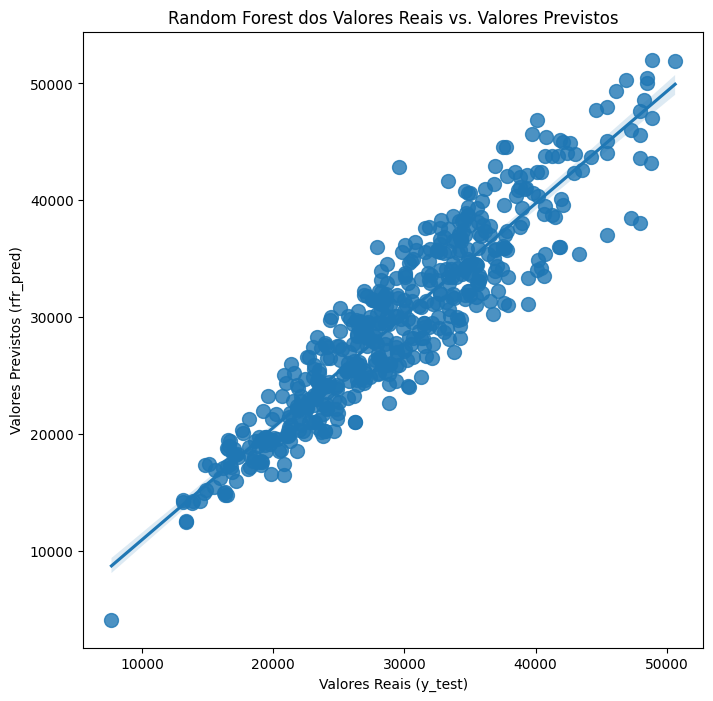

In [ ]:
plt.figure(figsize=(8, 8))
sns.regplot(x=rfr_pred, y=y_test, fit_reg=True, scatter_kws={"s": 100})
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Previstos (rfr_pred)')
plt.title('Random Forest dos Valores Reais vs. Valores Previstos')

R2 score: 0.8235079529550701
Mean squared error: 3369.6504026277544


Text(0.5, 1.0, 'KNN Regression dos Valores Reais vs. Valores Previstos')

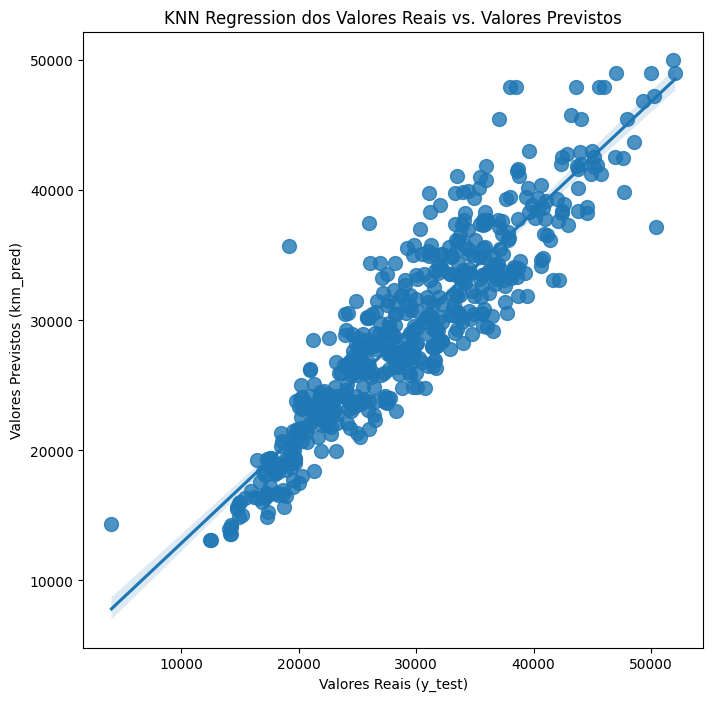

In [ ]:
#Algorimo de regressão por KN

from sklearn.neighbors import KNeighborsRegressor

# Inicializar e treinar o modelo
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)

# Fazer previsões
knn_pred = knn.predict(x_test)

# Avaliar o modelo
print('R2 score:', r2_score(y_test, knn_pred))
print('Mean squared error:', math.sqrt(mean_squared_error(y_test, knn_pred)))

# Plotar resultados
plt.figure(figsize=(8, 8))
sns.regplot(x=y_test, y=knn_pred, fit_reg=True, scatter_kws={"s": 100})
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Previstos (knn_pred)')
plt.title('KNN Regression dos Valores Reais vs. Valores Previstos')

#Modelo (Carros de luxo)


In [ ]:
#Luxury
cars_data_luxury = pd.get_dummies(cars_data_luxury, columns=cat_features)
x = cars_data_luxury.drop('price', axis=1)
y = cars_data_luxury['price']

x_train_luxury, x_test_luxury, y_train_luxury, y_test_luxury = train_test_split(x, y, test_size=0.2,
                                                    random_state=1)

In [ ]:
x_train_luxury = sc.fit_transform(x_train_luxury)
x_test_luxury = sc.transform(x_test_luxury)

In [ ]:
#Modelo Random Forest
rfr = RandomForestRegressor(n_estimators=50)
rfr_algo = make_pipeline(rfr)

rfr_algo.fit(x_train_luxury, y_train_luxury)
rfr_pred = rfr_algo.predict(x_test_luxury)

print("Random Forest Luxos e performance")
print('R2 score:', r2_score(y_test_luxury, rfr_pred))
print('Mean squared error:', math.sqrt(mean_squared_error(y_test_luxury, rfr_pred)))

Random Forest Luxos e performance
R2 score: 0.9598758306367834
Mean squared error: 4291.67418278108


Text(0.5, 1.0, 'Random Forest dos Valores Reais vs. Valores Previstos')

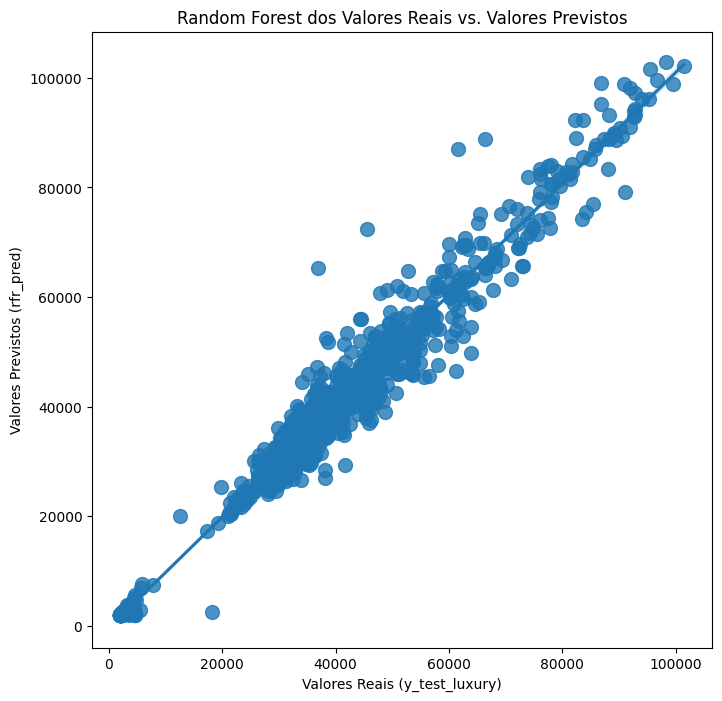

In [ ]:
plt.figure(figsize=(8, 8))
sns.regplot(x=rfr_pred, y=y_test_luxury, fit_reg=True, scatter_kws={"s": 100})
plt.xlabel('Valores Reais (y_test_luxury)')
plt.ylabel('Valores Previstos (rfr_pred)')
plt.title('Random Forest dos Valores Reais vs. Valores Previstos')

R2 score: 0.9038568314884562
Mean squared error: 6643.285722339521


Text(0.5, 1.0, 'KNN Regression dos Valores Reais vs. Valores Previstos')

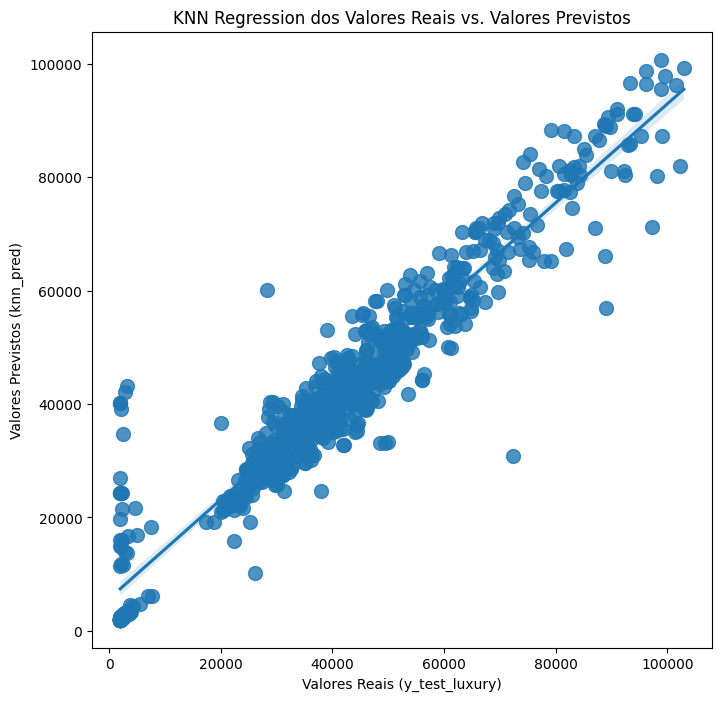

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Inicializar e treinar o modelo
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train_luxury, y_train_luxury)

# Fazer previsões
knn_pred = knn.predict(x_test_luxury)

# Avaliar o modelo
print('R2 score:', r2_score(y_test_luxury, knn_pred))
print('Mean squared error:', math.sqrt(mean_squared_error(y_test_luxury, knn_pred)))

# Plotar resultados
plt.figure(figsize=(8, 8))
sns.regplot(x=y_test_luxury, y=knn_pred, fit_reg=True, scatter_kws={"s": 100})
plt.xlabel('Valores Reais (y_test_luxury)')
plt.ylabel('Valores Previstos (knn_pred)')
plt.title('KNN Regression dos Valores Reais vs. Valores Previstos')